In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from os.path import join, exists
import matplotlib.patheffects as pe
import pickle

In [2]:
main_path = '/Users/kaushikborthakur1211/Desktop/DATA_PAPER/drkN/Charmm36m/reweight_trial/'
outdir = os.path.join(main_path +'/analyses')
if not os.path.exists(outdir):
    os.makedirs(outdir)
dic_dir = os.path.join(main_path +'/dictionaries')

with open('%s/KishScan_single_data.pkl' % dic_dir, 'rb') as fp:
    KishScan_single = pickle.load(fp)

with open('%s/KishScan_leave_one.pkl' % dic_dir, 'rb') as fp:
    Kish_leave = pickle.load(fp)

with open('%s/KishScan_combined.pkl' % dic_dir, 'rb') as fp:
    Kish_all_data = pickle.load(fp)

with open('%s/RMSE_single.pkl' % dic_dir, 'rb') as fp:
    RMSE_dict = pickle.load(fp)

with open('%s/RMSE_leave_one.pkl' % dic_dir, 'rb') as fp:
    RMSE_leave_one_dict = pickle.load(fp)

with open('%s/RMSE_combined.pkl' % dic_dir, 'rb') as fp:
    RMSE_dict_combined = pickle.load(fp)

with open('%s/theta_dict.pkl' % dic_dir, 'rb') as fp:
    theta_dict = pickle.load(fp)

with open('%s/theta_dict_combined.pkl' % dic_dir, 'rb') as fp:
    theta_dict_combined = pickle.load(fp)

with open('%s/theta_dict_leave_one.pkl' % dic_dir, 'rb') as fp:
    theta_dict_leave_one = pickle.load(fp)

with open('%s/colors.pkl' % dic_dir, 'rb') as fp:
    colors = pickle.load(fp)


In [3]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

legend_labels = {'CA': r'$C\alpha$', 'CB': r'$C\beta$', 'JHNHA': r'$^3{J}_{HNH\alpha}$',
                  'N': 'N', 'RDC': 'RDC', 'H': 'H', 'HA': r'$H\alpha$', 'PRE_2': 'PRE-2', 'PRE_59': 'PRE-59'}

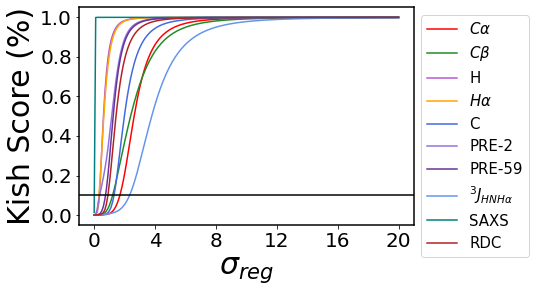

In [4]:
for key in KishScan_single:
        legend_label = legend_labels.get(key, key)
        plt.plot(KishScan_single[key]['kish'][:, 0], KishScan_single[key]['kish'][:, 1]/100, label=legend_label,
                 color=colors[key])
plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left', fontsize=15)
plt.xlabel(r'$\sigma_{reg}$', size=30)
plt.ylabel('Kish Score (%)', size=30)
xticks=np.linspace(0,20,6)
plt.xticks(ticks=xticks ,size=20)
plt.yticks(size=20)
plt.axhline(y=0.1, color='black', linestyle='-')
plt.savefig('%s/Kishscan.pdf'%outdir, bbox_inches='tight')
plt.show()

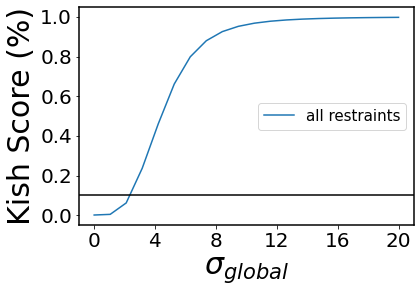

In [5]:
for key in Kish_all_data:
        plt.plot(Kish_all_data[key]['kish'][:, 0], Kish_all_data[key]['kish'][:, 1]/100, label='all restraints')
plt.legend( loc='best', fontsize=15)
plt.xlabel(r'$\sigma_{global}$', size=30)
plt.ylabel('Kish Score (%)', size=30)
xticks = np.linspace(0,20,6)
plt.xticks(ticks=xticks, size=20)
plt.yticks(size=20)
plt.axhline(y=0.1, color='black', linestyle='-')
plt.savefig('%s/Kishscan_combined.pdf'%outdir, bbox_inches='tight')

In [6]:
combined_key_string = 'CA-CB-H-HA-C-PRE_2-PRE_59-JHNHA-SAXS-RDC'
keys = set(combined_key_string.split("-"))

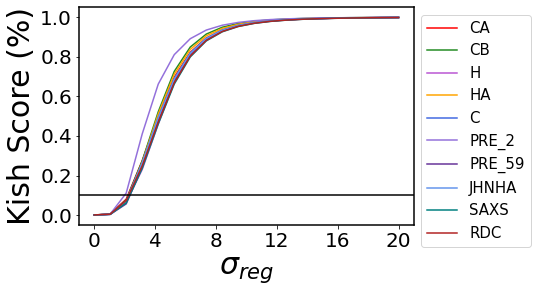

In [7]:
for key in Kish_leave:
        k = keys - set(key.split("-"))  # complement of the set of all being restrained
        plt.plot(Kish_leave[key]['kish'][:, 0], Kish_leave[key]['kish'][:, 1]/100, label=next(iter(k)), color=colors[next(iter(k))])
plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left', fontsize=15)
plt.xlabel(r'$\sigma_{reg}$', size=30)
plt.ylabel('Kish Score (%)', size=30)
xticks = np.linspace(0,20,6)
plt.xticks(ticks=xticks, size=20)
plt.yticks(size=20)
plt.axhline(y=0.1, color='black', linestyle='-')
plt.savefig('%s/Kishscan_leave_one.pdf'%outdir, bbox_inches='tight')

CA
CB
H
HA
C
PRE_2
PRE_59
JHNHA
SAXS
RDC


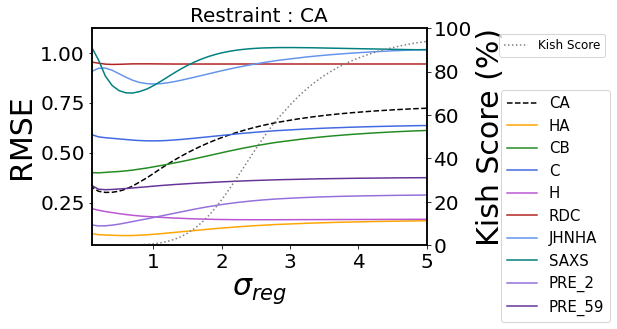

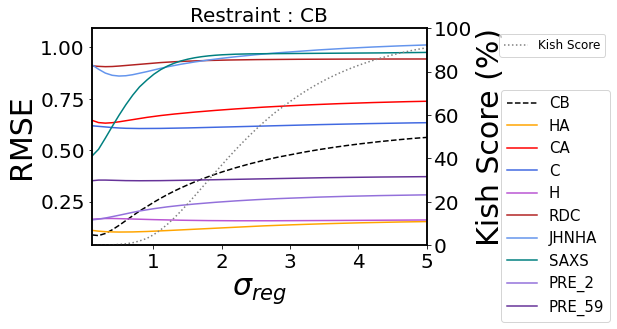

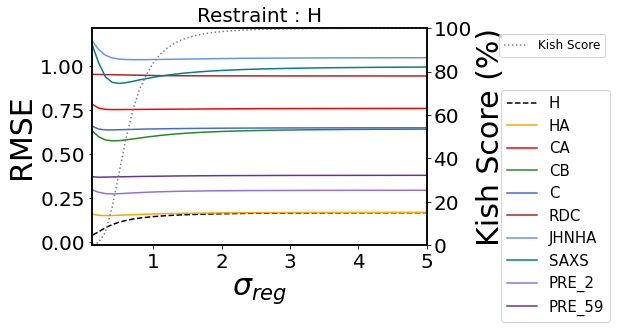

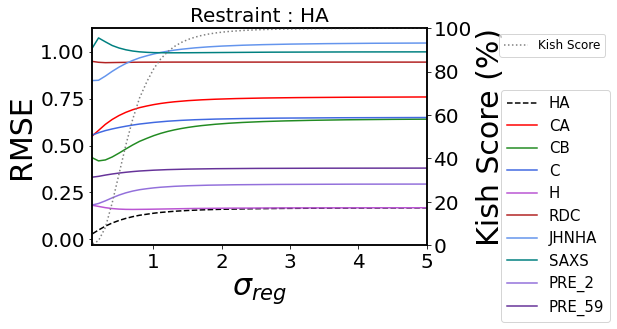

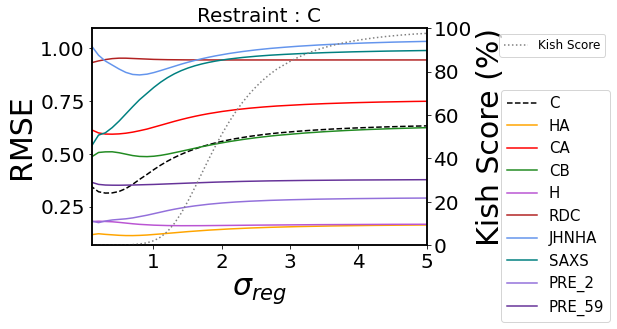

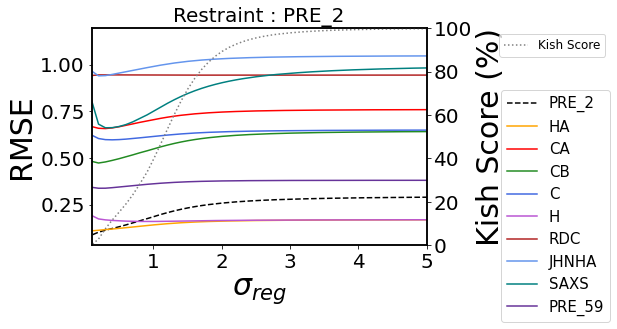

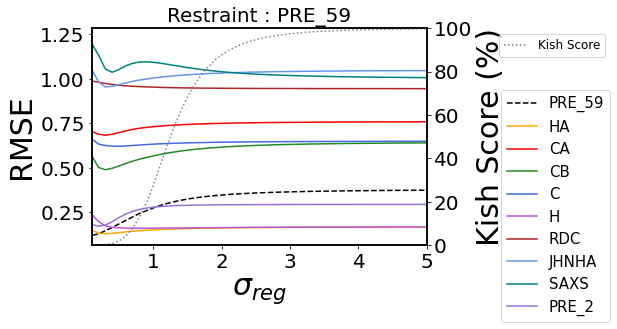

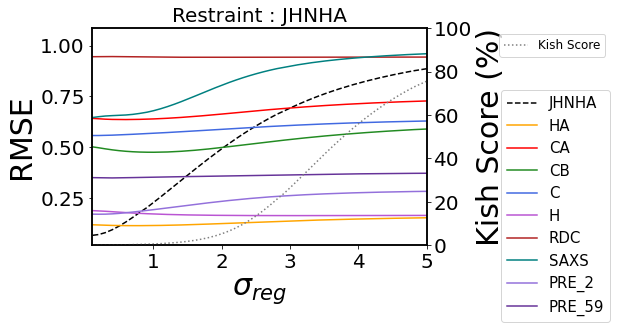

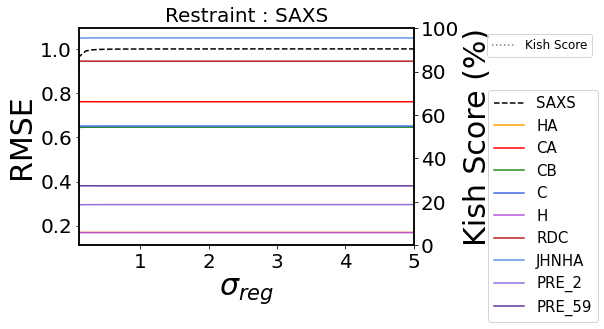

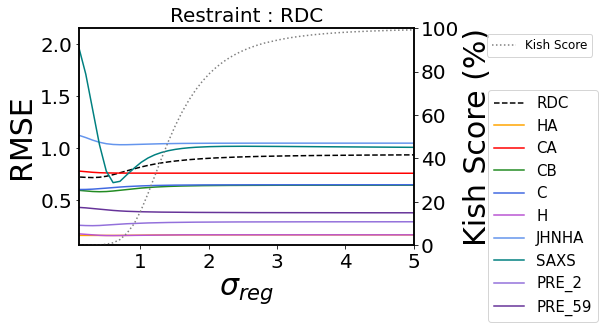

In [8]:
for key in RMSE_dict:
    print(key)
    kish = []
    theta = []
    rmse_r = []
    rmse_i = []
    for i in RMSE_dict[key].keys():
        kish.append(RMSE_dict[key][i]['Kish'])
        theta.append(i)
        rmse_r.append(RMSE_dict[key][i]['r_f'][key])
    rmse_i = float(RMSE_dict[key][i]['r_i'][key])
    theta_rev = np.asarray(theta, dtype=float)[::-1]
    rmse_r_rev = np.asarray(rmse_r, dtype=float)[::-1]
    if (key == 'SAXS'):
        rmse_r_rev = rmse_r_rev / rmse_i
    kish_rev = np.asarray(kish, dtype=float)[::-1]
    f, ax = plt.subplots()
    ax.plot(theta_rev, rmse_r_rev, label=key, c='black', linestyle='dashed')

    for key2 in RMSE_dict[key][i]['v_f'].keys():
        rmse_v = []
        for k in RMSE_dict[key].keys():
            rmse_v.append(RMSE_dict[key][k]['v_f'][key2])
        rmse_v_i = float(RMSE_dict[key][k]['v_i'][key2])
        rmse_v_rev = np.asarray(rmse_v, dtype=float)[::-1]
        if (key2 == 'SAXS'):
            rmse_v_rev = rmse_v_rev / rmse_v_i
        ax.plot(theta_rev, rmse_v_rev, label=key2, color=colors[key2])

    ax.tick_params(labelsize=20)
    ax.legend(bbox_to_anchor=(1.2, 0.75), loc='upper left', fontsize=15)
    ax.set_title(f"Restraint : {key}", size=20)
    ax.set_xlabel(r'$\sigma_{reg}$', size=30)
    ax.set_ylabel("RMSE", size=30)
    ax.set_xlim(0.1, 5)

    ax2 = ax.twinx()
    ax2.plot(theta_rev, kish_rev, color='grey', ls='dotted', label='Kish Score')
    ax2.set_ylabel("Kish Score (%)", size=30)
    ax2.set_ylim(0, 100)
    ax2.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left', fontsize=12)
    ax2.tick_params(labelsize=20)
    plt.savefig('%s/%s.rmse_v_kish_v_sigma.pdf'%(outdir,key), bbox_inches="tight")

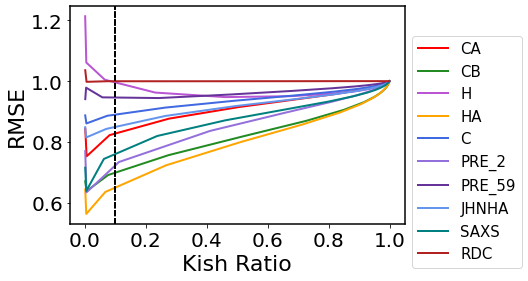

In [9]:
 def plot_Kish_RMSE_normalized(rmse_dict):
    for key in rmse_dict:
        rmse = []
        kish = []
        for i in rmse_dict[key].keys():
            kish.append(rmse_dict[key][i]['Kish']/100)
        for i in rmse_dict[key].keys():
            for key2 in rmse_dict[key][i]['v_f'].keys():
                rmse.append(rmse_dict[key][i]['v_f'][key2])
        plt.plot(kish, rmse / rmse[0], label=key2, color=colors[key2],linewidth=2.0)
        plt.tick_params(labelsize=20)
        plt.legend(bbox_to_anchor=(1.0, 0.9), loc='upper left', fontsize=15)
        plt.xlabel("Kish Ratio", size=22)
        xticks=np.linspace(0,1.0,6)
        plt.xticks(xticks)
        plt.ylabel("RMSE", size=22)
        plt.axvline(x=0.1, color='black', linestyle='dashed')
        plt.grid()
        plt.savefig('%s/Kish_vs_RMSE_normalized.pdf' % outdir, bbox_inches='tight', dpi=1600)

plot_Kish_RMSE_normalized(RMSE_leave_one_dict)

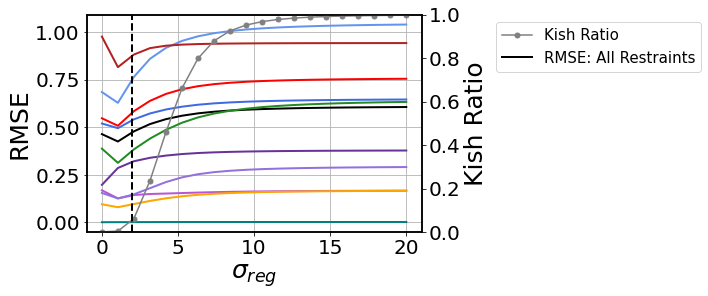

In [10]:
label_map = {'CA': r'$C_\alpha$',
             'CB': r'$C_\beta$',
             'HA': r'$H_\alpha$',
             'JHNHA': r'$^3{J}_{HNH\alpha}$',
             'PRE_2': 'PRE-2',
             'PRE_59': 'PRE-59',
            'Tot': 'RMSE: All Restraints'}


kish=[]
theta=[]
rmse_r=[]
for i in RMSE_dict_combined[combined_key_string].keys():
    kish.append(RMSE_dict_combined[combined_key_string][i]['Kish'])
    theta.append(i)
theta_rev=np.asarray(theta,dtype=float)[::-1]
kish_rev=np.asarray(kish,dtype=float)[::-1]/100
f, ax = plt.subplots()
for key2 in RMSE_dict_combined[combined_key_string][i]['r_f'].keys():
    rmse_r=[]
    for k in RMSE_dict_combined[combined_key_string].keys():
        rmse_r.append(RMSE_dict_combined[combined_key_string][k]['r_f'][key2])
    rmse_r_rev=np.asarray(rmse_r,dtype=float)[::-1]
    label = label_map.get(key2,key2)
    ax.plot(theta_rev,rmse_r_rev,label=label,color = colors[key2],linewidth=2.0)


ax.tick_params(labelsize=20)
ax.set_xlabel(r'$\sigma_{reg}$', size = 25)
ax.set_ylabel("RMSE", size=25)
ax.grid()       
ax2 = ax.twinx()
ax2.plot(theta_rev,kish_rev, color = 'grey', marker='.',markersize=10, label = 'Kish Ratio')
ax2.set_ylabel("Kish Ratio", size =25)
ax2.set_ylim(0,1.0)
ax2.tick_params(labelsize=20)
plt.axvline(x=2.0, linestyle='--', color='black', linewidth=2.0)

handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles2 + [handles1[0]]
labels = labels2 + [labels1[0]]

ax.legend(handles, labels, bbox_to_anchor=(1.2,1.0), loc='upper left', fontsize=15)
plt.savefig('%s/rmse_v_kish_v_sigma.pdf' % (outdir), bbox_inches='tight', dpi=1600)

In [11]:
reweighting_keys = ['CA', 'CB', 'H', 'HA', 'C', 'PRE_2', 'PRE_59', 'JHNHA', 'SAXS', 'RDC']

keys = list(theta_dict.keys())
keys2 = list(np.round(np.array(list(theta_dict.values())), 2))
keys2 = ["{:.2f}".format(value) for value in keys2]
dfs = []
columns = "initial,final".split(',')
for k, k2 in zip(keys, keys2):
    if k2 == "0.0": k2 += "0"
    data = []
    index = []
    index.append(k)
    data.append([RMSE_dict[k][k2][i][k] for i in "r_i,r_f".split(",")])
    for k3 in keys:
        if k3 != k:
            data.append([RMSE_dict[k][k2][i][k3] for i in "v_i,v_f".split(",")])
            index.append(k3)
    l = np.array(data)
    index = np.array(index)
    df = pd.DataFrame(data=l, index=index, columns=columns)
    dfs.append(df)
df_dict = dict(zip(keys, dfs))

In [12]:
keys = list(theta_dict_combined.keys())
keys2 = list(np.round(np.array(list(theta_dict_combined.values())), 2))
keys2 = ["{:.2f}".format(value) for value in keys2]
keys3 = list(theta_dict.keys())
dfs = []
columns = "initial,final".split(',')
for k, k2, k3 in zip(keys, keys2, keys3):
    if k2 == "0.0": k2 += "0"
    data = []
    index = []
    for k3 in keys3:
        data.append([RMSE_dict_combined[k][k2][i][k3] for i in "r_i,r_f".split(",")])
        index.append(k3)

    l = np.array(data)
    index = np.array(index)
    df = pd.DataFrame(data=l, index=index, columns=columns)
    dfs.append(df)
df_dict_combined = dict(zip(keys, dfs))

In [13]:
def subframe(df, key, key2):
        df_key = df_dict[key].assign(Unbiased_MD=df_dict[key][key2].round(3))
        df_key = df_key.drop(columns=['initial', 'final'])
        df_key = df_key.T[reweighting_keys].round(3)
        return df_key


def subframe_combined(df, key, key2):
    df_key = df_dict_combined[key].assign(all_data=df_dict_combined[key][key2].round(3))
    df_key = df_key.drop(columns=['initial', 'final'])
    df_key = df_key.T[reweighting_keys].round(3)
    return df_key

In [14]:
subframes_only_initial = subframe(df_dict['CA'], 'CA', 'initial')
subframes_combined = subframe_combined(df_dict_combined[combined_key_string], combined_key_string, 'final')

subframes_final = pd.concat([subframe(df_dict, i, 'final') for i in reweighting_keys])
subframes_final.index = subframes_final.columns

table = pd.concat([subframes_only_initial, subframes_combined, subframes_final])

In [15]:
keys = list(theta_dict_leave_one.keys())
keys2 = list(np.round(np.array(list(theta_dict_leave_one.values())), 2))
keys2 = ["{:.2f}".format(value) for value in keys2]
keys3 = list(theta_dict.keys())
dfs = []
columns = "initial,final".split(',')
data_f = []
data_i = []
for k, k2 in zip(keys, keys2):
    if k2 == "0.0": k2 += "0"
    d_f = []
    d_i = []
    klist = k.split("-")
    for k3 in keys3:
        if k3 in set(klist):
            d_f.append(RMSE_leave_one_dict[k][k2]["r_f"][k3])
            d_i.append(RMSE_leave_one_dict[k][k2]["r_i"][k3])
        else:
            d_f.append(RMSE_leave_one_dict[k][k2]["v_f"][k3])
            d_i.append(RMSE_leave_one_dict[k][k2]["v_i"][k3])
    data_f.append(np.array(d_f))
    data_i.append(np.array(d_i))

data_mat_f = np.stack(data_f, axis=0)
data_mat_i = np.stack(data_i, axis=0)
left_out = [list(set(keys3) - set(k.split("-")))[0] for k in keys]

table_left_out = pd.DataFrame(data=data_f, index=left_out, columns=left_out)
cross_validation = np.diagonal(table_left_out)

In [16]:
table_leave_one_out = pd.concat([subframes_only_initial, subframes_combined, table_left_out])

table_new = table.rename(
    columns={'CA': r'C$\alpha$', 'CB': r'C$\beta$', 'HA': r'H$\alpha$', 'PRE_2': 'PRE-2', 'PRE_59': 'PRE-59'},
    index={'Unbiased_MD': 'Unbiased MD', 'all_data': 'All restraints',
            'CA': r'C$\alpha$', 'CB': r'C$\beta$', 'HA': r'H$\alpha$', 'PRE_2': 'PRE-2', 'PRE_59': 'PRE-59'})

table_new['Average'] = np.average((table_new / (table_new.iloc[0])), axis=1).round(3)


In [17]:
import matplotlib
import seaborn as sns

def plot_mat(df: "pandas dataframe", title, unit, cbarlabel, textsize, textcolor, cmap, filename,
                 fig_dims: tuple = (40, 40),
                 epsilon=0):
        """mat = square matrix
        unit = string specifying the units"""
        mat = df.to_numpy()
        ratio = mat / mat[0, :]
        divnorm = matplotlib.colors.TwoSlopeNorm(vmin=ratio.min(), vcenter=1., vmax=ratio.max() + epsilon)
        fig, ax = plt.subplots(1, figsize=fig_dims)
        s = sns.heatmap(pd.DataFrame(ratio, index=df.index, columns=df.columns), linewidths=1,
                        linecolor='black', cmap=cmap, norm=divnorm, ax=ax, cbar_kws={'label': cbarlabel, 'aspect': 15})
        s.figure.axes[-1].set_ylabel(cbarlabel, size=60)
        for i in range(len(mat)):
            for j in range(mat.shape[1]):
                c = mat[i, j]
                ax.text(j + .5, i + .5, f"{np.round(c, 3)}{unit}",
                        va='center', ha='center', color=textcolor, size=textsize, weight="bold")
        cax = plt.gcf().axes[-1]
        cax.tick_params(labelsize=60)
        ax.tick_params(labelsize=60, top=True)
        ax.tick_params(axis="y", rotation=0)
        ax.tick_params(axis="x", rotation=30)
        ax.xaxis.tick_top()
        figpath = os.path.join(outdir, filename)

        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)

        for _, spine in cax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(7)

        plt.savefig(figpath, bbox_inches='tight')
        return

In [18]:
diagonal_array = np.diagonal(subframes_final)
cross_validation = pd.DataFrame(data=cross_validation, columns=['Cross Validation'], index=left_out).T
single_restraints = pd.DataFrame(data=diagonal_array, columns=['Single Restraints'], index=left_out).T
table_left_out = pd.concat([subframes_only_initial, subframes_combined, single_restraints, cross_validation]).round(3)
columns_to_round = table_left_out.columns.difference(['SAXS'])
table_left_out[columns_to_round] = table_left_out[columns_to_round].round(2)

In [19]:
table_new_left_one = table_left_out.rename(columns={'CA': r'C$\alpha$', 'CB': r'C$\beta$', 'HA': r'H$\alpha$','JHNHA': r'$^3{J}_{HNH\alpha}$',
                                                    'PRE_2': 'PRE-2', 'PRE_59': 'PRE-59'},
                                            index={'Unbiased_MD': 'Unbiased \n MD', 'all_data': 'All \n restraints',
                                                    'Single Restraints': 'Single \n restraints', 'Cross Validation':'Cross \n Validation'})

In [20]:
filename = 'RMSE_left_one.pdf'

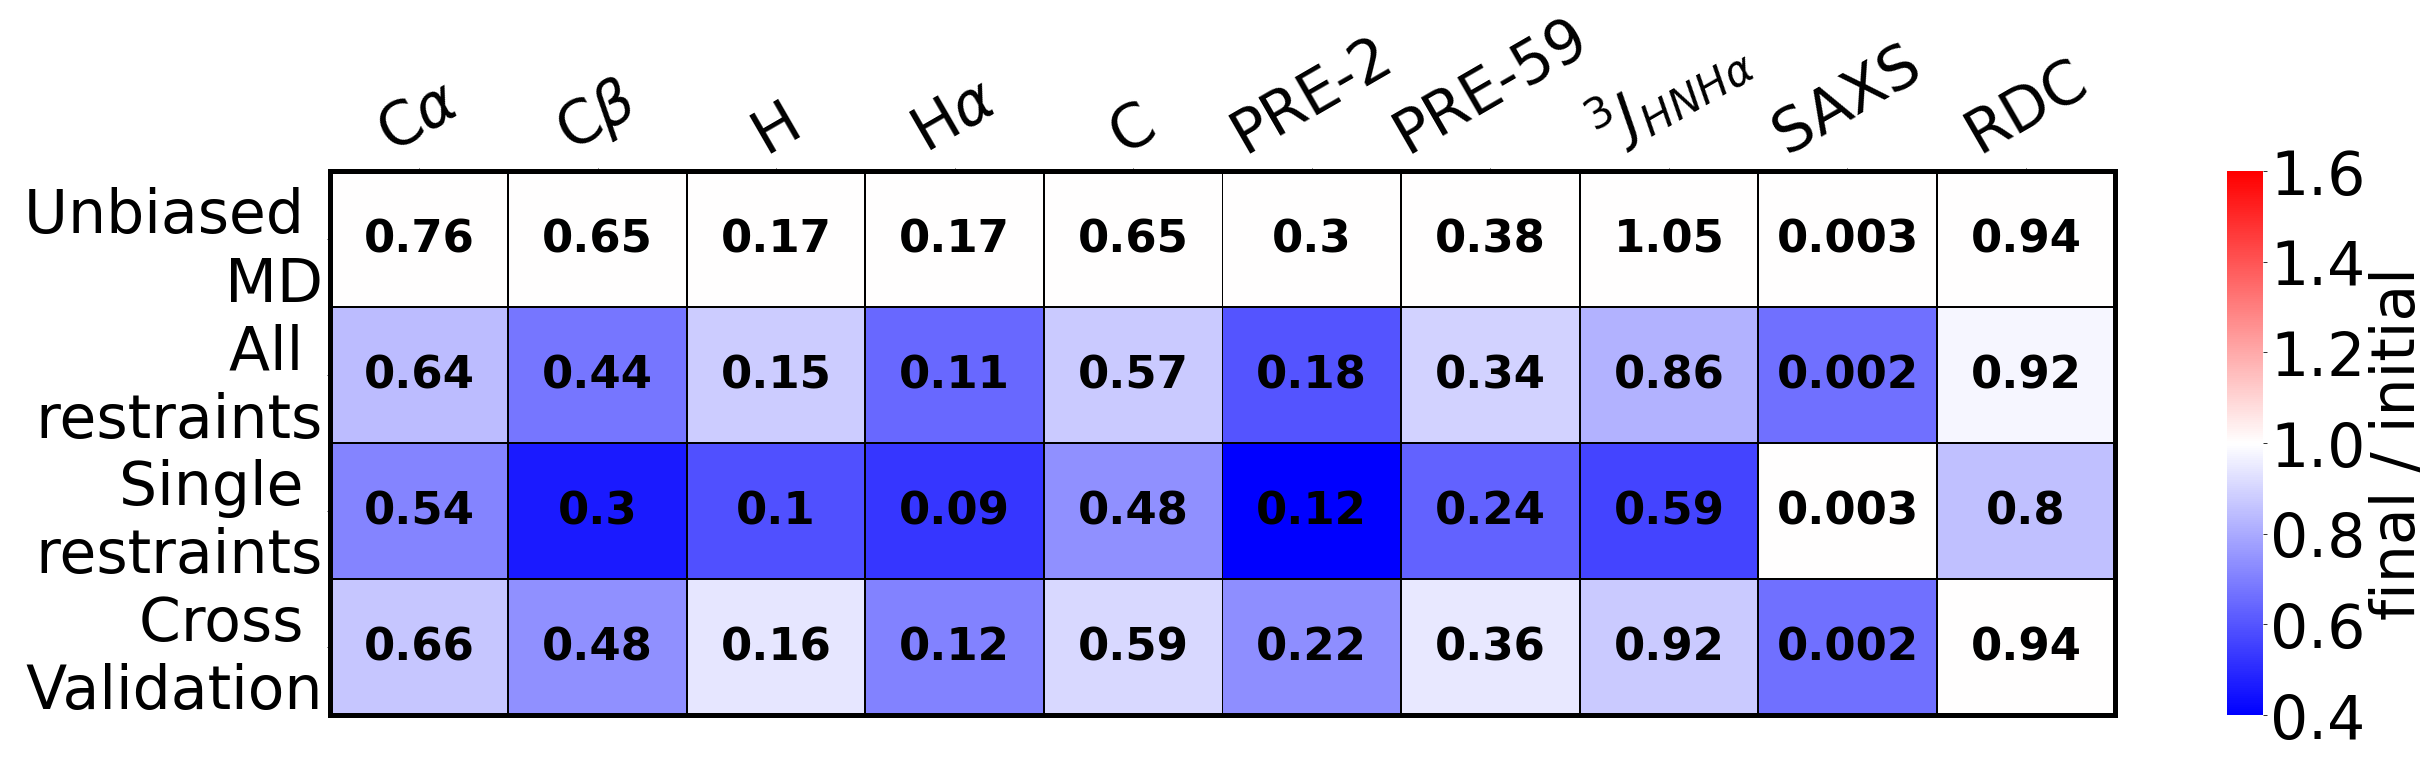

In [21]:
plot_mat(table_new_left_one, " ", "", "final / initial", 45, "black", "bwr", filename, fig_dims=(40, 10), epsilon=0.6)